# Lecture 17


### This lecture

Continue introduce basic features and usage of the **pandas** library

In [1]:
# import module
import pandas as pd
# for some examples, we also need numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt


**pandas** library mainly provides data structures and methods for representing and manipulating data

### Two main data structure of pandas are the following objects
* **Series**: represent data series
* **DataFrame**: represent tabular data

## DataFrame

We have seen **pandas Series** object provides a convinient container for one-dimensional arrays, which can use descriptive labels as index.

For higher-dimensional arrays (or tables), the corresponding data structure is the Pandas DataFrame object. It can be viewed as a collection of **Series** objects with a common index.

In [2]:
df = pd.DataFrame([[909976,"Sweden"],
                   [8615246,"United Kindom"],
                   [2872086,"Italy"],
                   [2273305,"France"]])

In [3]:
df

,0,1
0,909976,Sweden
1,8615246,United Kindom
2,2872086,Italy
3,2273305,France


In [4]:
df.index=["Stokholm","London","Rome","Paris"]

In [5]:
df.columns=["Population","State"]

In [6]:
df

,Population,State
Stokholm,909976,Sweden
London,8615246,United Kindom
Rome,2872086,Italy
Paris,2273305,France


Alternatively, we can pass all the information to the constructor to create the DataFrame object

In [7]:
df= pd.DataFrame([[909976,"Sweden"],
                   [8615246,"United Kindom"],
                   [2872086,"Italy"],
                   [2273305,"France"]],
                index=["Stokholm","London","Rome","Paris"],
                columns=["Population","State"])

In [8]:
df

,Population,State
Stokholm,909976,Sweden
London,8615246,United Kindom
Rome,2872086,Italy
Paris,2273305,France


Yet another way to construct the same dataframe object. This can be more convinient sometimes

In [9]:
df=pd.DataFrame({"Population":[909976,8615246,2872086,2273305],
                 "State":["Sweden","United Kindom","Italy","France"]},
               index=["Stokholm","London","Rome","Paris"])

In [10]:
df

,Population,State
Stokholm,909976,Sweden
London,8615246,United Kindom
Rome,2872086,Italy
Paris,2273305,France


As before, the underlining data can be obtained as a Numpy array by using the **values** attributes

In [11]:
df.values

array([[909976, 'Sweden'],
       [8615246, 'United Kindom'],
       [2872086, 'Italy'],
       [2273305, 'France']], dtype=object)

Accessing the column arrays:

In [12]:
df.Population

Stokholm     909976
London      8615246
Rome        2872086
Paris       2273305
Name: Population, dtype: int64

In [14]:
# alternative way
df["Population"]

Stokholm     909976
London      8615246
Rome        2872086
Paris       2273305
Name: Population, dtype: int64

In [16]:
df.State # or we can access it using df["State"]

Stokholm           Sweden
London      United Kindom
Rome                Italy
Paris              France
Name: State, dtype: object

To access the rows arrays, we use the **loc** attribute

In [17]:
df.loc["Stokholm"]

Population    909976
State         Sweden
Name: Stokholm, dtype: object

In [18]:
df.loc[["Paris","Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [19]:
df.loc[["Paris","Rome"],"Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

We can also compute the descriptive statistics using the same methods as we did for the Series objects.

When invoking those methods (**mean, std, median,min,max**, etc.) for a DataFrame object, the calculation is performed for each column with numerical data types:

In [20]:
df.mean()

Population    3667653.25
dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stokholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [23]:
df.dtypes

Population     int64
State         object
dtype: object

The real advantage of using **pandas** is when dealing with larger and more complex datasets than the simple example we have done so far.

A more common situation is that the data must be read from a file. 

Example, we use read_csv function to read in data and create a DataFrame object from a CSV file

In [24]:
df_population=pd.read_csv("european_cities.csv",header=0)

In [25]:
df_population

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013
...,...,...,...,...,...
100,101,Bonn,Germany,"309,869",31 December 2012
101,102,Malmö,Sweden,"309,105",31 March 2013
102,103,Nottingham,United Kingdom,"308,735",30 June 2012
103,104,Katowice,Poland,"308,269",30 June 2012


In [26]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


Note that only  **Rank** is numeric, however, the population is not. This is becaues population is in format "8,615,246", so it is interpreted as a string by the **read_csv** function

The dataset is to large to display in full. We can use **head** or **tail** methods to show part of the dataset


In [27]:
df_population.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [28]:
df_population.head(7)

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013
5,6,Bucharest,Romania,"1,883,425",20 October 2011
6,7,Vienna,Austria,"1,794,770",1 January 2015


In [29]:
df_population[0:5]

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [30]:
df_population.tail()

,Rank,City,State,Population,Date of census/estimate
100,101,Bonn,Germany,"309,869",31 December 2012
101,102,Malmö,Sweden,"309,105",31 March 2013
102,103,Nottingham,United Kingdom,"308,735",30 June 2012
103,104,Katowice,Poland,"308,269",30 June 2012
104,105,Kaunas,Lithuania,"306,888",1 January 2013


We can use the **apply** method to treat/transform the raw data into the desired format

In [31]:
df_population["NumericalPopulation"]=0 # create an additional column 

In [32]:
df_population

,Rank,City,State,Population,Date of census/estimate,NumericalPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,0
1,2,Berlin,Germany,"3,437,916",31 May 2014,0
2,3,Madrid,Spain,"3,165,235",1 January 2014,0
3,4,Rome,Italy,"2,872,086",30 September 2014,0
4,5,Paris,France,"2,273,305",1 January 2013,0
...,...,...,...,...,...,...
100,101,Bonn,Germany,"309,869",31 December 2012,0
101,102,Malmö,Sweden,"309,105",31 March 2013,0
102,103,Nottingham,United Kingdom,"308,735",30 June 2012,0
103,104,Katowice,Poland,"308,269",30 June 2012,0


In [33]:
df_population["NumericalPopulation"]=df_population.Population.apply(lambda x:int(x.replace(",","")))

In [34]:
df_population

,Rank,City,State,Population,Date of census/estimate,NumericalPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305
...,...,...,...,...,...,...
100,101,Bonn,Germany,"309,869",31 December 2012,309869
101,102,Malmö,Sweden,"309,105",31 March 2013,309105
102,103,Nottingham,United Kingdom,"308,735",30 June 2012,308735
103,104,Katowice,Poland,"308,269",30 June 2012,308269


In [35]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
NumericalPopulation        105 non-null int64
dtypes: int64(2), object(4)
memory usage: 5.0+ KB


In [36]:
df_population["State"].values[0:4]

array([' United Kingdom', ' Germany', ' Spain', ' Italy'], dtype=object)

we see each state contains extra white space, and we want to remove the white space

In [37]:
df_population["State"]=df_population["State"].apply(lambda x:x.strip())

In [38]:
df_population["State"].values[0:4]

array(['United Kingdom', 'Germany', 'Spain', 'Italy'], dtype=object)

In [39]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
NumericalPopulation        105 non-null int64
dtypes: int64(2), object(4)
memory usage: 5.0+ KB


In [41]:
df_population.head()

,Rank,City,State,Population,Date of census/estimate,NumericalPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


We still have integer index. We can change the index to one of the columns of the DataFrame 

In [42]:
df_population2=df_population.set_index("City")

In [43]:
df_population2

,Rank,State,Population,Date of census/estimate,NumericalPopulation
City,,,,,
London[2],1,United Kingdom,"8,615,246",1 June 2014,8615246
Berlin,2,Germany,"3,437,916",31 May 2014,3437916
Madrid,3,Spain,"3,165,235",1 January 2014,3165235
Rome,4,Italy,"2,872,086",30 September 2014,2872086
Paris,5,France,"2,273,305",1 January 2013,2273305
...,...,...,...,...,...
Bonn,101,Germany,"309,869",31 December 2012,309869
Malmö,102,Sweden,"309,105",31 March 2013,309105
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735


In [44]:
df_population2.sort_index()

,Rank,State,Population,Date of census/estimate,NumericalPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046
...,...,...,...,...,...
Wrocław,35,Poland,"632,432",31 March 2014,632432
Wuppertal,83,Germany,"342,885",31 December 2012,342885
Zagreb,24,Croatia,"790,017",31 March 2011,790017


We can create a hierarchical index with State and City, and sort the index by the first index (State,level=0)

In [45]:
df_population3=df_population.set_index(["State","City"]).sort_index(level=0)

In [46]:
df_population3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericalPopulation  
State    City                               
Austria  Vienna                    1794770  
Belgium  Antwerp                    510610  
         Brussels[17]              1175831  
Bulgaria Plovdiv                    341041  
         Sofia                     1291895  
         Varna                      335819  
Croatia  Zagreb                     790017

In [47]:
df_population3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericalPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [48]:
df_population3.loc[("Sweden","Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericalPopulation               528014
Name: (Sweden, Gothenburg), dtype: object

We can count how many cities in each state

In [49]:
city_counts=df_population.State.value_counts()

In [50]:
city_counts

Germany                     19
United Kingdom              16
Spain                       13
Italy                       10
Poland                      10
France                       5
Netherlands                  4
Sweden                       3
Romania                      3
Bulgaria                     3
Lithuania                    2
Denmark                      2
Czech Republic               2
Greece                       2
Belgium                      2
Slovakia Slovak Republic     1
Austria                      1
Croatia                      1
Hungary                      1
Finland                      1
Ireland                      1
Portugal                     1
Estonia                      1
Latvia                       1
Name: State, dtype: int64

We can use delete unwanted columns using **drop** method

In [51]:
df_population4=(df_population3.drop("Rank",axis=1)) # axis=1 for column, axis=0 for row

In [52]:
df_population4

Population Date of census/estimate  \
State          City                                              
Austria        Vienna        1,794,770          1 January 2015   
Belgium        Antwerp         510,610          1 January 2014   
               Brussels[17]  1,175,831          1 January 2014   
Bulgaria       Plovdiv         341,041        31 December 2013   
               Sofia         1,291,895        14 December 2014   
...                                ...                     ...   
United Kingdom Manchester      510,772            30 June 2012   
               Nottingham      308,735            30 June 2012   
               Sheffield       557,382            30 June 2012   
               Wakefield       327,627            30 June 2012   
               Wirral          320,229            30 June 2012   

                             NumericalPopulation  
State          City                               
Austria        Vienna                    1794770  
Belgium        Antwerp                    510610  
               Brussels[17]              1175831  
Bulgaria       Plovdiv                    341041  
               Sofia                     1291895  
...                                          ...  
United Kingdom Manchester                 510772  
               Nottingham                 308735  
               Sheffield                  557382  
               Wakefield                  327627  
               Wirral                     320229  

[105 rows x 3 columns]

Compute total population in each state using **groupby** method

In [53]:
df_population5=df_population4.groupby("State").sum().sort_values("NumericalPopulation",ascending=False)

In [54]:
df_population5

,NumericalPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


plot the results

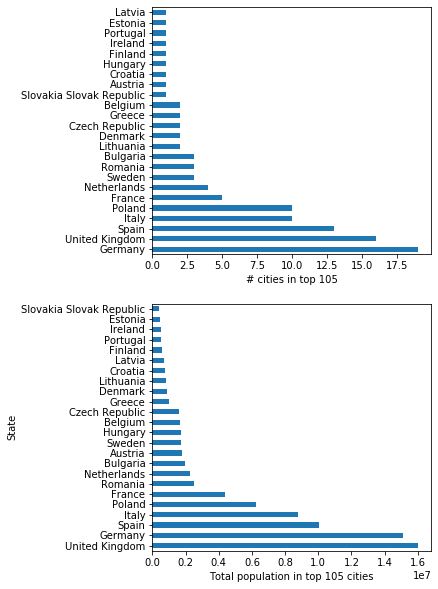

In [55]:
fig,axes=plt.subplots(2,1,figsize=(5,10))
city_counts.plot(kind='barh',ax=axes[0])
axes[0].set_xlabel("# cities in top 105")
df_population5.NumericalPopulation.plot(kind='barh',ax=axes[1])
axes[1].set_xlabel("Total population in top 105 cities")
plt.show()
